# **Kaggle HW5: [Pritika Vipin]**

**Remember to write your team name above, which MUST match your team name on Kaggle!!** Assignments without a team name will receive a 0/40 on the "accuracy on test data" component of this assignment's grade.

### **Load the Data**

In [ ]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_train.csv',
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_test.csv',
          'edx_test.csv')

### **Sample Code: Random Classifier**

**NOTE**: This classifier **DOES NOT** count as one of the 2 required for this assignment! It is merely here to illstrate how to submit your predictions.

See the Kaggle assignment (Data tab) for a description of each column in the dataset. You are creating a classifier to predict whether or not a student will get certified, stored in the `"certified"` column.

In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier

target = "certified" # target column

# This classifier returns labels sampled uniformly at random
df_train = pd.read_csv('edx_train.csv')
dummy_model = DummyClassifier(strategy="uniform")
dummy_model.fit(df_train.drop(target, axis=1), df_train[target])

DummyClassifier(strategy='uniform')

In [ ]:
print(df_train.head())

                    course_id       userid_DI  registered  viewed  explored  \
0         HarvardX/CS50x/2012  MHxPC130545492           1       1         1   
1  HarvardX/ER22x/2013_Spring  MHxPC130536944           1       1         1   
2         HarvardX/CS50x/2012  MHxPC130442298           1       1         1   
3  HarvardX/ER22x/2013_Spring  MHxPC130273564           1       1         1   
4         HarvardX/CS50x/2012  MHxPC130247761           1       1         0   

   certified final_cc_cname_DI      LoE_DI     YoB gender start_time_DI  \
0          1     United States    Master's  1984.0      m       3/10/13   
1          1    United Kingdom    Master's  1985.0      f       3/13/13   
2          1             India         NaN     NaN    NaN        8/2/12   
3          1    United Kingdom  Bachelor's  1982.0      m       1/23/13   
4          0     United States   Secondary  1989.0      m        3/5/13   

  last_event_DI  nevents  ndays_act  nplay_video  nchapters  nforum_posts 

The code below generates predictions on the test set, and outputs the predictions into a CSV file.

In [ ]:
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')
predictions = dummy_model.predict(df_test)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

### **[5 Pts] Model Comparison**

**Instructions**: Run at least 2 different classification models. The classification models we have learned in class are: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html). For each model, try at least 2 different hyperparameter settings.

Then, make one or more visualizations that let you compare the models you trained. Sample visualizations you can make include confusion matrices, or graphs of train and validation accuracy/error. See past section and homework code for how to make these visualizations.

In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

train = pd.read_csv('edx_train.csv')
test = pd.read_csv('edx_test.csv')
target = 'certified'
x_train = train.drop(target, axis=1)
y_train = train[target]
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(test)
x_train, x_test = x_train.align(x_test, join = 'left', axis=1)

x_train = x_train.fillna(0)
x_test = x_test.fillna(0)
knn_params = {'n_neighbors': [2, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_cv.fit(x_train, y_train)
knn_pred = knn_cv.predict(x_test)

print("best parameters for kNN", knn_cv.best_params_)
print("best cross validation accuracy for kNN:", knn_cv.best_score_)
#my output: best parameters for kNN {'n_neighbors': 7, 'weights': 'distance'}
#best cross validation accuracy for kNN: 0.961292307852786
# Saving predictions as a CSV
to_save_1 = df_test[['userid_DI']].copy()
to_save_1.loc[:, 'certified'] = knn_pred
to_save_1.to_csv('knn2_submission.csv', index=False)


best parameters for kNN {'n_neighbors': 9, 'weights': 'distance'}
best cross validation accuracy for kNN: 0.96152094432666


In [18]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

train = pd.read_csv('edx_train.csv')
test = pd.read_csv('edx_test.csv')
target = 'certified'


x_train = train.drop(target, axis=1)
y_train = train[target]
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(test)
x_train, x_test = x_train.align(x_test, join = 'left', axis=1)
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)
ada_params = {'n_estimators': [50, 100], 'learning_rate': [0.1, 1]}
ada = AdaBoostClassifier()
ada_cv = GridSearchCV(ada,ada_params, cv=5, scoring='accuracy')
ada_cv.fit(x_train, y_train)
ada_pred = ada_cv.predict(x_test)

print("best parameters for adaboost", ada_cv.best_params_)
print("best cross validation accuracy for adaboost:", ada_cv.best_score_)


#my output: best parameters for adaboost {'learning_rate': 0.1, 'n_estimators': 100}
#best cross validation accuracy for adaboost: 0.9615210095209783
# Saving predictions as a CSV
#to_save_1 = df_test[['userid_DI']].copy()
#to_save_1.loc[:, 'certified'] = ada_pred
#to_save_1.to_csv('adaboost_submission.csv', index=False)

best parameters for adaboost {'learning_rate': 0.1, 'n_estimators': 100}
best cross validation accuracy for adaboost: 0.9615210095209783


Above I realized I hadn't used split data into validation so I did that below. I kept the initial csvs as validation does not directly change the values on the CSVS i created above. Please look down here for my full code for KNN classfier and AdaBoost Classifier. The features I choose were the ones I believed would be most impactful on predicting the most accurate results.

kNN Classification Report:                precision    recall  f1-score   support

           0       0.97      0.94      0.96       968
           1       0.93      0.97      0.95       784

    accuracy                           0.95      1752
   macro avg       0.95      0.95      0.95      1752
weighted avg       0.95      0.95      0.95      1752

adaboost classification report:                precision    recall  f1-score   support

           0       0.99      0.93      0.96       968
           1       0.92      0.99      0.96       784

    accuracy                           0.96      1752
   macro avg       0.96      0.96      0.96      1752
weighted avg       0.96      0.96      0.96      1752



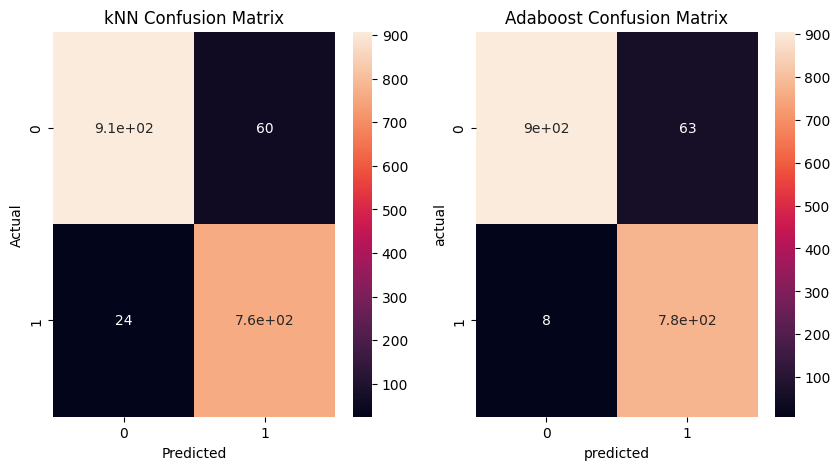

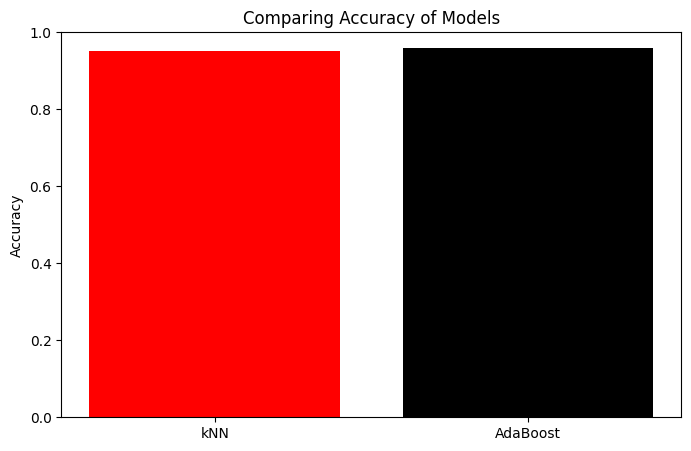

In [21]:
#total stuff

import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('edx_train.csv')
test = pd.read_csv('edx_test.csv')
target = 'certified'
features = ['viewed', 'explored', 'registered', 'final_cc_cname_DI', 'LoE_DI', 'gender', 'YoB', 'nplay_video', 'nchapters', 'nforum_posts']
#x_train = train.drop(target, axis=1)
x_train = train[features]
y_train = train[target]
# this was how I tried to handle categoriucal vairbales and make them numerical!
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(test[features])
x_train, x_test = x_train.align(x_test, join = 'left', axis=1)
# I wanted to handle NAN to change it to 0
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)
# n_neighbors of 9 ended up being best
x_train_split, x_val_split , y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2)
knn_params = {'n_neighbors': [2, 5, 7, 9],
              'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_cv.fit(x_train_split, y_train_split)
knn_val_pred = knn_cv.predict(x_val_split)
# note I tried changing up the estimators and playing around with 40, 50, 100 but it was too computationally expensive and runtime was over 30 min to execute so I changed it back to what I found were basic values for n_estimators and using extremes of learning rate/
ada_params = {'n_estimators': [50,  100],
              'learning_rate': [0.1, 1]}
ada = AdaBoostClassifier()
ada_cv = GridSearchCV(ada, ada_params, cv=5, scoring='accuracy')
ada_cv.fit(x_train_split, y_train_split)
ada_val_predictions = ada_cv.predict(x_val_split)



knn_confusion = confusion_matrix(y_val_split, knn_val_pred)
ada_confusion = confusion_matrix(y_val_split, ada_val_predictions)
knn_accuracy = accuracy_score(y_val_split, knn_val_pred)
ada_accuracy = accuracy_score(y_val_split, ada_val_predictions)


print("kNN Classification Report: ", classification_report(y_val_split, knn_val_pred))
print("adaboost classification report: ", classification_report(y_val_split, ada_val_predictions))
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.heatmap(knn_confusion, annot=True, ax=axes[0])
axes[0].set_title("kNN Confusion Matrix")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
sns.heatmap(ada_confusion, annot=True, ax=axes[1])
axes[1].set_title('Adaboost Confusion Matrix')
axes[1].set_xlabel('predicted')
axes[1].set_ylabel('actual')
plt.show()
models = ['kNN', 'AdaBoost']
accuracies = [knn_accuracy, ada_accuracy]
plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['red', 'black'])

plt.ylabel('Accuracy')
plt.title("Comparing Accuracy of Models")
plt.ylim(0,1)
plt.show()

## Analysis of Results/Visualization above:
class 0(where user is not certified) the knn model had a precision of 99% and a recall of 93% The F1 score was 0.96.
In Class 1(where user was certified) knn model had a precision of 92% and recall was 97% and the F1 score was 0.95.

Weighted Averages for kNN: precision, recall,& f1score was all 0.95

class 0(where user is not certified) the adaBoost model had a precision of 99% and a recall of 94% The F1 score was 0.96.
In Class 1(where user was certified) adaBoost model had a precision of 93% and recall was 98% and the F1 score was 0.95.
Weighted Averages for AdaBoost precision, recall and f1 score was all 0.96.

Adaboost has a slighlty better accuracy than kNN, Adaboost is better than knn in class 0 precision, and better in recall for class 1.

High precision of both models mean few false positive errors.

**Remember to submit your submissions CSV FILE on Kaggle!** 40 pts come from your accuracy on the private test data.

Attend section on Thurs 5/11 for a demo of how to uppload submissions to Kaggle. We also have screenshots below (ingore summer and homework number in pictures)

Step 1: See the list of files on Colab

![See Colab Files](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/1_colab_see_files.jpg)

Step 2: Download `submission.csv`

![Download Colab File](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/2_colab_download_file.jpg)

Step 3: Join the Kaggle competition.

![Join the Kaggle Competition](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/3_kaggle_join_competition.jpg)

Step 4: Enusre your team name in Kaggle matches the one at the top of this notebook!

![Check Team Name](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/4_kaggle_team_name.jpg)

Step 5: Upload `submission.csv` to Kaggle

![Upload submission.csv](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/6_kaggle_upload_submission.jpg)



### **Discussion**



#### **[7 Pts] Training the Models**

**Instructions**: Discuss what models you tried, and what you did to improve your initial predictions. Discuss what hyperparameters you tried, and which hyperparameters seemed important for your final model. Finally, discuss what you are inferring from the above visualiation(s).

I tried kNN model and Adaboost. I used GridSeach CV for hyperparameter tuning and choosing the best combination of hyperparameters.

I tried hyperparameters for kNN: n_neighbors': [2, 5, 7, 9],
              'weights': ['uniform', 'distance']

              hyperparameters for AdaBoost: ada_params = {'n_estimators': [40, 50, 100],
              'learning_rate': [0.1, 0.5, 1]}


For knn the hyperparameters that worked best were 9 and distance. For Adaboost the hyperparameters that worked best were n_estimators 100, learning rate 0.1.

Inferring the above visualization: for knn when user was not certified precision was 98%, recall was 97% for actual certified users, and accurcay was 95%

For AdaBoost when users were not certified preciison was 99%, recall was 98% for certified users, and accurcay was 96%.

#### **[3 Pts] Feature Selection**

**Instructions**: Discuss what features you used and whether you did some transformations on them. What features seemed important for your final model?

the features I choose were ['viewed', 'explored', 'registered', 'final_cc_cname_DI', 'LoE_DI', 'gender', 'YoB', 'nplay_video', 'nchapters', 'nforum_posts']

I handled missing values NaNs by filling them in with 0s. by doing x_train = pd.get_dummies(x_train) I did one-hot encoding of all the categorical variables to turn them into numerical variables and followed suit for the test set by aligning them i also made sure that they were equivalent in # of columns.



#### **[5 Pts] Ethical Implications**

**Instructions**: Consider and discuss the ethical implications of using the model you trained. Imagine you were hired to work as a data scientist for an online education platform (exciting, right?). They want to use your model to predict which students they should tailor their course material towards so they can maximize their profits. Their idea is to use the model to help predict which student groups (i.e. from specific countries or certain educational backgrounds) would make them the most money by getting the most participants to complete their paid certificate program. Are there any ethical considerations we should think about before acting on that plan?

Yes! By only focusing on specific students from the predictions of who will be most likely to pay(or pay most?) there will be some students who will be disadvanatged especially those from poorer countries and those who are underrepresneted in the dataset. There could also be bias in the dataset that can cause unfair preidctions esepcially if groups ar emisrepresneted in the dataset itself. We should also aim for tranparency about the blackbox methollogy of how the model is making preidctions for the online education platform. There are also valid privacy and consent issues that arise as students should be told beforehand how their data will be used.
Note we should consider not only profit but student outcomes and how they will be affected. We also don't want to reinforce sterotypes and be biased towards students from some countries or of some background.

Another important point is by only foucisng on the reccomendations by the model we could lose diversity in the methods used to teach which could lead to reducing valudable perspectives.